# **ANÁLISIS EXPLORATORIO - MACHINE LEARNING** 

## **VISUALIZACIÓN**

Voy insnstalar y configurar Colab, para poder trabajar, desde ambos ambientes. Se debe a la cantidad de registros.

Instalo las librerias que en un primer momento voy a usar.


In [48]:
#habilito lectura en Drive PARA COLAB
#from google.colab import drive
#drive.mount('/content/drive')

In [49]:
!pip install pyarrow
import pyarrow.parquet as pq
import pandas as pd
import pyarrow.parquet as pq


In [50]:
# Abro el archivo Parquet en un DataFrame de pandas

#df = pd.read_parquet('/content/PROYECTOINDIVIDUAL/data_ml.parquet') #COLAB
df = pd.read_parquet('/Users/CarlaCarrasco/Desktop/PROYECTOINDIVIDUALUNO/data_ml.parquet') #VSC


In [51]:
#Corroboro los datos del dataframe, como primera instancia.
df.head()

,id,type,title,director,cast,country,date_added,year,rating,listed_in,description,duration_int,duration_type,scored,platform,userId,score,timestamp
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,543,5.0,2003-07-30
1,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,595,3.0,1996-08-13
2,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,611,3.0,2001-01-03
3,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,2523,3.5,2012-06-25
4,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,3082,4.0,2000-03-30


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 11024288
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             object        
 1   type           object        
 2   title          object        
 3   director       object        
 4   cast           object        
 5   country        object        
 6   date_added     datetime64[ns]
 7   year           int64         
 8   rating         object        
 9   listed_in      object        
 10  description    object        
 11  duration_int   int64         
 12  duration_type  object        
 13  scored         float64       
 14  platform       object        
 15  userId         int64         
 16  score          float64       
 17  timestamp      object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(12)
memory usage: 1.6+ GB


Compruebo primero que hay filas duplicadas. Mi decision es eliminarlas

In [53]:
print("El total de datos duplicados en el dataset es de: ", df.duplicated().sum())


El total de datos duplicados en el dataset es de:  10466


In [54]:
df.drop_duplicates(inplace = True)


In [55]:
#Corroboro la información al respecto.
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11013823 entries, 0 to 11024288
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             object        
 1   type           object        
 2   title          object        
 3   director       object        
 4   cast           object        
 5   country        object        
 6   date_added     datetime64[ns]
 7   year           int64         
 8   rating         object        
 9   listed_in      object        
 10  description    object        
 11  duration_int   int64         
 12  duration_type  object        
 13  scored         float64       
 14  platform       object        
 15  userId         int64         
 16  score          float64       
 17  timestamp      object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(12)
memory usage: 1.6+ GB


In [56]:
print("El total de datos duplicados en el dataset es de: ", df.duplicated().sum())

El total de datos duplicados en el dataset es de:  0


## **EDA**

Comienzo a **explorar** y **transformar**


Para esto, voy a modificar columnas y también hacer cambios en datos, explorando las relaciones de mis datos.

Determino que las variables en entorno a las que va a girar mi modelo de ML, son lps **'id'** y **'title'**:


### **Análisis de contenido por plataforma**

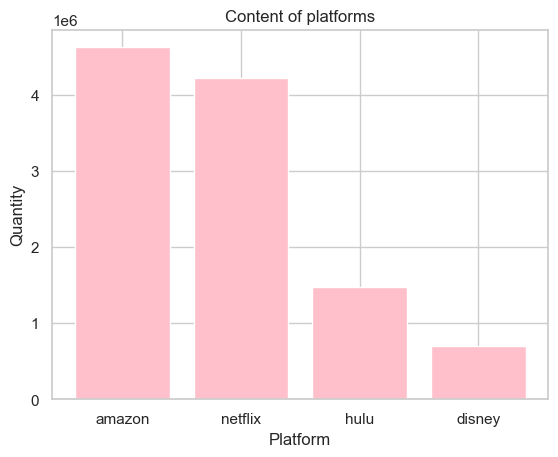

In [57]:
frecuencia = df['platform'].value_counts()
import matplotlib.pyplot as plt

plt.bar(frecuencia.index, frecuencia.values, color = 'pink')
plt.xlabel('Platform')
plt.ylabel('Quantity')
plt.title('Content of platforms')
plt.show()

### **Análisis de contenido por país**

Agrupo los datos por país de elaboración de contenido y cuento el número de títulos en cada grupo. Para ver cuales sonn los mayores creadores de contenido. Debido a que la cantidad de paises son muchos, lo reduzco a los diez primeros.

In [58]:
datos_agrupados = df.groupby("country")["title"].count()
datos_agrupados = datos_agrupados.sort_values(ascending=False)[:10]

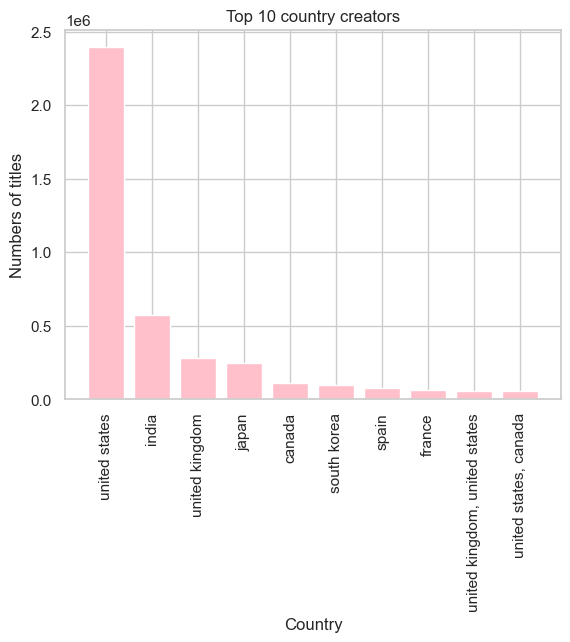

In [59]:
import matplotlib.pyplot as plt

plt.bar(datos_agrupados.index, datos_agrupados.values, color= 'pink')
plt.xlabel("Country")
plt.ylabel("Numbers of titles")
plt.title("Top 10 country creators")
plt.xticks(rotation=90)
plt.show()


###  **Análisis de usuarios**

Calificaciones de contenido por usuario, me permite saber un poco mas cuales son los mas activos

In [60]:
df_1 = df.groupby("userId").count()
df_1 = df_1.head(10)
df_1.head()

,id,type,title,director,cast,country,date_added,year,rating,listed_in,description,duration_int,duration_type,scored,platform,score,timestamp
userId,,,,,,,,,,,,,,,,,
1,27,27,27,16,22,16,17,27,27,27,27,27,27,27,27,27,27
2,22,22,22,9,14,13,16,22,22,22,22,22,22,22,22,22,22
3,10,10,10,6,6,4,6,10,10,10,10,10,10,10,10,10,10
4,62,62,62,38,45,33,43,62,62,62,62,62,62,62,62,62,62
5,26,26,26,11,19,14,17,26,26,26,26,26,26,26,26,26,26


### **Análisis de títulos y calificaciones**

Determinamos el **'title'** con más calificaciones.

In [61]:
df_more = df.groupby('title')['score'].count().sort_values(ascending=False)
df_more.head()

title
married at first sight       1935
moesha                       1524
national treasure            1501
america's book of secrets    1482
cold case files              1482
Name: score, dtype: int64

### **Análisis de la columna *'type'***

Distribucion de valores en la columna **'type'**

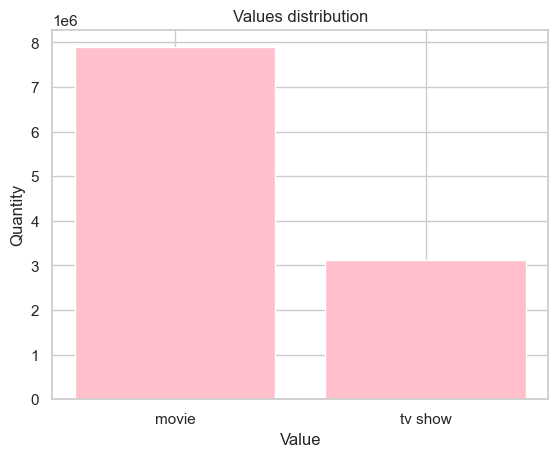

In [62]:
frecuencia = df['type'].value_counts()

plt.bar(frecuencia.index, frecuencia.values, color = 'pink')
plt.xlabel('Value')
plt.ylabel('Quantity')
plt.title('Values distribution')
plt.show()


### **Análisis de contenido por popularidad**

In [63]:
df_titulos= df.groupby(['title']).count()
df_titulos.sort_values('scored', ascending = False, inplace = True)
df_titulos = df_titulos.rename(columns={'scored': 'high_scored'})
df_titulos.head(10)

,id,type,director,cast,country,date_added,year,rating,listed_in,description,duration_int,duration_type,high_scored,platform,userId,score,timestamp
title,,,,,,,,,,,,,,,,,
married at first sight,1935,1935,0,1467,987,987,1935,1935,1935,1935,1935,1935,1935,1935,1935,1935,1935
moesha,1524,1524,0,506,1017,1017,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524
national treasure,1501,1501,1021,1021,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
america's book of secrets,1482,1482,0,999,964,964,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482
cold case files,1482,1482,0,483,999,999,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482
four weddings and a funeral,1481,1481,972,972,1007,1007,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
yu-gi-oh! arc-v,1480,1480,0,1028,494,946,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
the girl with the dragon tattoo,1480,1480,988,988,988,1000,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
merlin,1475,1475,482,1004,953,953,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475


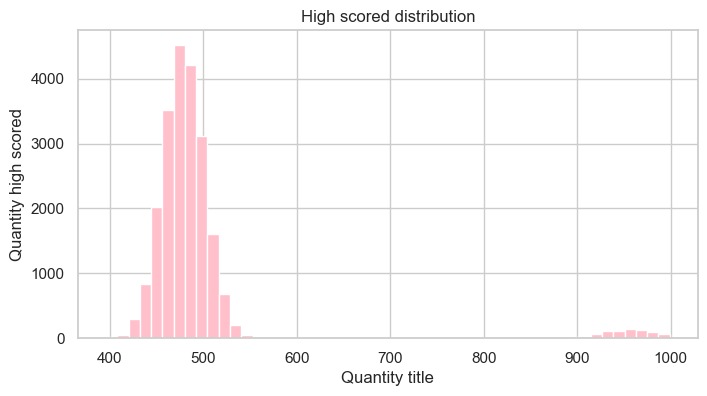

In [64]:
plt.figure(figsize = (8,4))

df_titulos.high_scored[df_titulos.high_scored<1000].hist(bins = 50, color = 'pink')
plt.xlabel('Quantity title')
plt.ylabel('Quantity high scored')
plt.title('High scored distribution')

plt.show()

### **Análisis de rating de contenido**

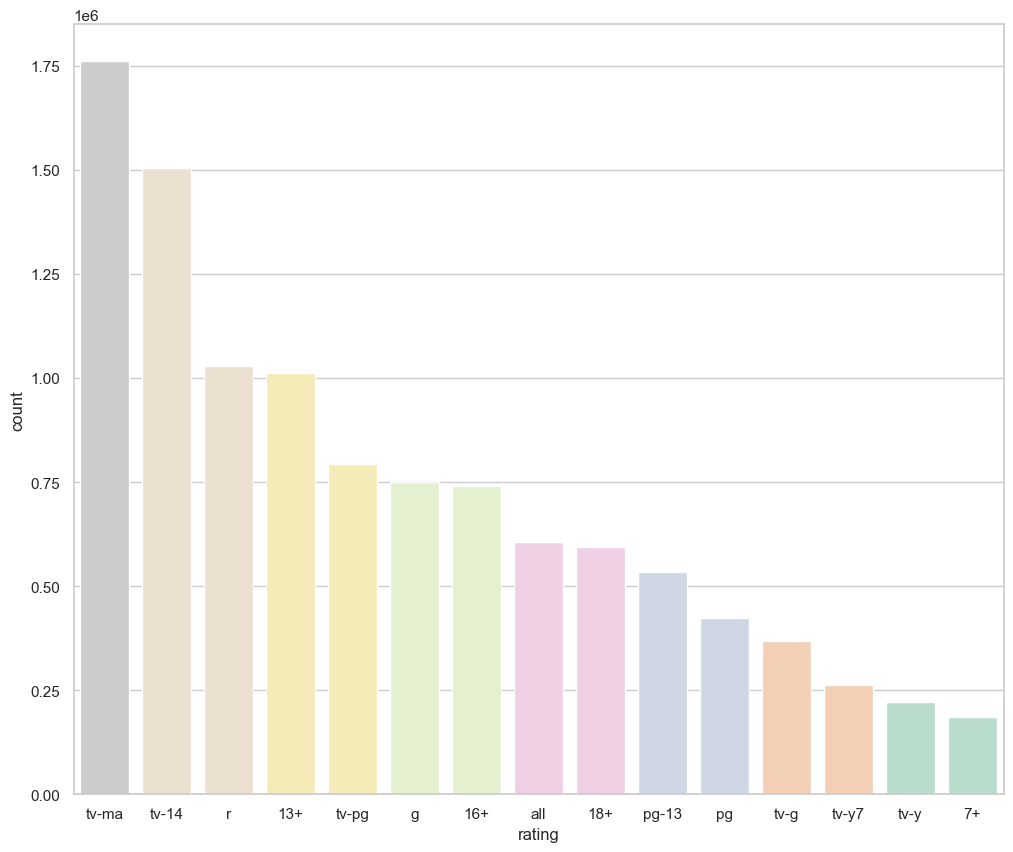

In [65]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data= df, palette="Pastel2_r", order=df['rating'].value_counts().index[0:15])

La mayor cantidad de contenido se realiza con la calificación 'TV-MA' es una calificación asignada a contenido que fue diseñado solo para usuarios mayores.

El segundo más grande es el 'TV-14' que significa contenido que puede ser inapropiado para niños menores de 14 años.

La tercera más grande es la muy popular clasificación 'R'. Una película con clasificación R es una película que ha sido evaluada por la Motion Picture Association of America como que tiene material que puede ser inadecuado para niños menores de 17 años; la MPAA escribe "Los menores de 17 años requieren un padre o tutor adulto que los acompañe".

### **Análisis de creacion del contenido**

In [66]:
df['year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927, 1928])

In [67]:
content_year=df[[ 'year', 'title']]

In [68]:
content_year['year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927, 1928])

In [69]:
content_year = content_year.drop_duplicates(subset='title')

In [70]:
content_year= content_year.sort_values(by='year')[:20]
content_year.head()

,year,title
39927,1920,within our gates
706545,1920,nomads of the north
615904,1920,pollyanna
548369,1922,robin hood (silent)
683187,1922,one exciting night


In [71]:
import plotly.graph_objs as go
import plotly.io as pio

In [72]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'year'],fill_color='lightpink'),
                 cells=dict(values=[content_year['title'],content_year['year']],fill_color='antiquewhite'))
                     ])
fig.show()

**Observo lo mismo pero con los mas nuevos lanzamientos**

In [73]:
contenido_reciente =df[[ 'year', 'title']]

In [74]:
contenido_reciente = contenido_reciente.drop_duplicates(subset='title')

In [75]:
contenido_reciente = contenido_reciente.sort_values(by='year', ascending = False)[0:500]#[0:100] Siguen siendo las ultimas agregadas las del 2021
contenido_reciente.head()

,year,title
7462611,2021,blown away
4742661,2021,star wars biomes
2090110,2021,the priest
4743657,2021,the bad batch
2088764,2021,who needs enemies


In [76]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'year'],fill_color='lightpink'),
                 cells=dict(values=[contenido_reciente['title'],contenido_reciente['year']],fill_color='antiquewhite'))
                     ])
fig.show()

### **Análisis de directores con más películas**

In [77]:
df_directors = df[['director', 'title']].drop_duplicates()
top_directors = df_directors['director'].value_counts().head(5)

In [78]:
top_directors.head()

mark knight              113
cannis holder             61
jay chapman               42
moonbug entertainment     37
arthur van merwijk        30
Name: director, dtype: int64

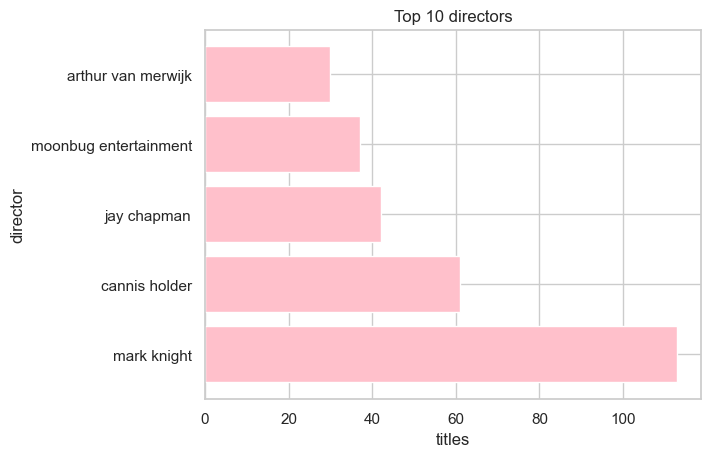

In [79]:
import matplotlib.pyplot as plt

plt.barh(top_directors.index, top_directors.values, color='pink')
plt.title('Top 10 directors')
plt.xlabel('titles')
plt.ylabel('director')

plt.show()


### **Análisis de actores más populares**

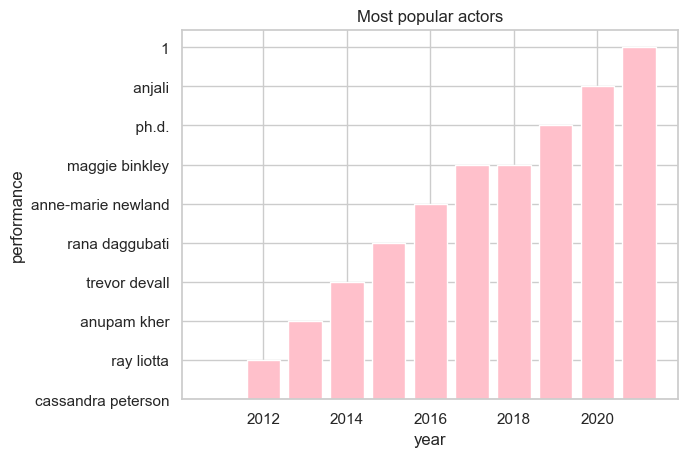

In [80]:
#ACTORES MAS POPULARES POR ANIO EN LOS ULTIMOS DIEZ ANIOS
# Seleccionar solo las películas de los últimos diez años
last_10_years = df[df['year'] >= df['year'].max() - 10]

# Elimino los registros que contengan valores nulos en "cast"
last_10_years = last_10_years.dropna(subset=['cast'])

# seleccionar solo el actor con mas apariciones en ese anio.
actor_counts = last_10_years.groupby('year')['cast'].apply(lambda x: x.str.split(',').explode().value_counts().index[0])

##Grafico

plt.bar(actor_counts.index, actor_counts.values, color='pink')
plt.xlabel('year')
plt.ylabel('performance')
plt.title('Most popular actors')
plt.show()


### **Análisis de variables interesantes para el modelo**


#### **Correlacion entre 'score' y 'userId'**

In [81]:
import pandas as pd
corr = df['userId'].corr(df['score'])
print(corr)
#el valor positivo indica una correlación positiva (a medida que aumenta el "userId", también lo hace el "score")

0.0046163972059835336


#### **Correlación entre la plataforma y la puntuación promedio**

In [82]:
# Agrupo por plataforma y calcular la media de las calificaciones
platform_scores = df.groupby('platform')['score'].mean()

# Calculo la correlación entre las puntuaciones por plataforma y la puntuación total
corr = df['score'].corr(platform_scores)

print("Correlacion entre 'platform' and 'score':", corr) 


Correlacion entre 'platform' and 'score': nan


Este **nan** indica que es posible que la distribución de los datos sea tal que no haya una correlación significativa entre las dos variables.

#### **Correlación entre la 'duration' y 'score'**

In [83]:
corr = df['duration_int'].corr(df['score'])

print(corr)


-0.0003295484499874815


#### **Matriz de correlacion entre 'userId' y 'score'**

In [84]:
columnas_numericas = ['userId', 'score']
matriz_corr = df[columnas_numericas].corr()

<AxesSubplot:>

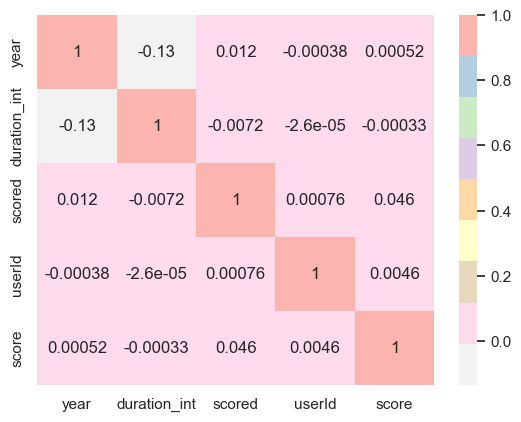

In [85]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap='Pastel1_r', annot=True)


La diagonal principal de la matriz siempre es 1, ya que la correlación de una columna consigo misma es perfecta. Los valores de la matriz de correlación varían entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica una falta de correlación, y 1 indica una correlación positiva perfecta.


## **DATASET MACHINE LEARNING**

Concluido el EDA puedo definir que las variables mas importantes para hacer un modelo de ML que prediga recomendaciones, son los siguientes:


> *'userId'*: Identifica de manera única a cada usuario en eldf. Es importante incluir esta variable ya que el objetivo es hacer recomendaciones personalizadas para cada usuario.

> *'id'*: Permite identificar de manera única a cada película. Me aegura que no voy a recomendar dos veces la misma película a un usuario.



> *'score'*: Es la variable a predecir en el modelo de recomendación. Al incluir el score dejo una pista importante para el algoritmo de aprendizaje automático sobre lo que tiene que saber predecir. **VARIABLE OBJETIVO**


Trabajo para dejar el dataset lo mas simple posible para la ultima parte. 

In [86]:
df.head()

,id,type,title,director,cast,country,date_added,year,rating,listed_in,description,duration_int,duration_type,scored,platform,userId,score,timestamp
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,543,5.0,2003-07-30
1,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,595,3.0,1996-08-13
2,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,611,3.0,2001-01-03
3,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,2523,3.5,2012-06-25
4,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.47,amazon,3082,4.0,2000-03-30


Voy a descargar un archivo parquet completo de registros y luego, hacer una muestra.

In [87]:
#Armo un df con las columnas que necesito.
dataset_COMPLETO = df[['id', 'title', 'userId', 'score']]

In [88]:
dataset_COMPLETO.to_parquet('dataset_COMPLETO.parquet')

Lo primero que voy a hacer es armar una muestra representativa de cada plataforma y formar un dataset con menos datos, para aplicar machine learning. Esto fue una decision  compleja, pero debido a los recursos con los que estoy trabajando de momento es lo mas efectivo y funcional.

In [89]:
# Agrupo el dataset por los valores únicos de la columna de plataformas
grupos = df.groupby("platform")

# Creo una lista vacía para almacenar los datos muestreados
muestra = []

# Iterar sobre cada grupo
for grupo in grupos:
    tamano_muestra = int(len(grupo[1]) / len(df) * 400000)# Obtengo el tamaño de la muestra proporcional al tamaño del grupo
    muestra_grupo = grupo[1].sample(tamano_muestra, random_state=42)# Selecciono una muestra aleatoria del tamaño correspondiente
    muestra.append(muestra_grupo) # Agrego la muestra al conjunto de datos
nuevo_datos = pd.concat(muestra)  #Combino todas las muestras en un solo dataset


In [90]:
nuevo_datos.head()
nuevo_datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399998 entries, 2812758 to 8662390
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             399998 non-null  object        
 1   type           399998 non-null  object        
 2   title          399998 non-null  object        
 3   director       256246 non-null  object        
 4   cast           307326 non-null  object        
 5   country        200348 non-null  object        
 6   date_added     233917 non-null  datetime64[ns]
 7   year           399998 non-null  int64         
 8   rating         399998 non-null  object        
 9   listed_in      399998 non-null  object        
 10  description    399931 non-null  object        
 11  duration_int   399998 non-null  int64         
 12  duration_type  399998 non-null  object        
 13  scored         399998 non-null  float64       
 14  platform       399998 non-null  object       

In [91]:
dataset_ML = nuevo_datos[['id', 'title', 'userId', 'score']]

In [92]:
dataset_ML.head()

,id,title,userId,score
2812758,as5866,back to gaya,57727,3.5
2182950,as4553,the exorcism in amarillo,55215,5.0
4567909,as9535,pune 52,19690,3.0
257814,as538,the mine adventure with shawn the train and te...,116794,2.0
4250346,as8869,arthur & merlin: knights of camelot,258137,5.0


In [93]:
#Convierto el dataset a archivo parquet, para levantarlo.

dataset_ML.to_parquet('dataset_ML.parquet')